In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Пример на анализ зависимостей

Данные https://www.kaggle.com/ruslankl/mice-protein-expression

Уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых с синдромом Дауна, подверженных контекстному обусловливанию страха, задача, используемая для оценки ассоциативного обучения.
Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки.

Загружаем данные и смотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [3]:
data = pd.read_csv('./mice-protein-expression.zip')
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Простые описательные статистики по вещественным параметрам

In [4]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Некоторая информация о таблице

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
MouseID            1080 non-null object
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAF_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null 

Визуализируем данные в первых двух колонках в двумерных проекциях

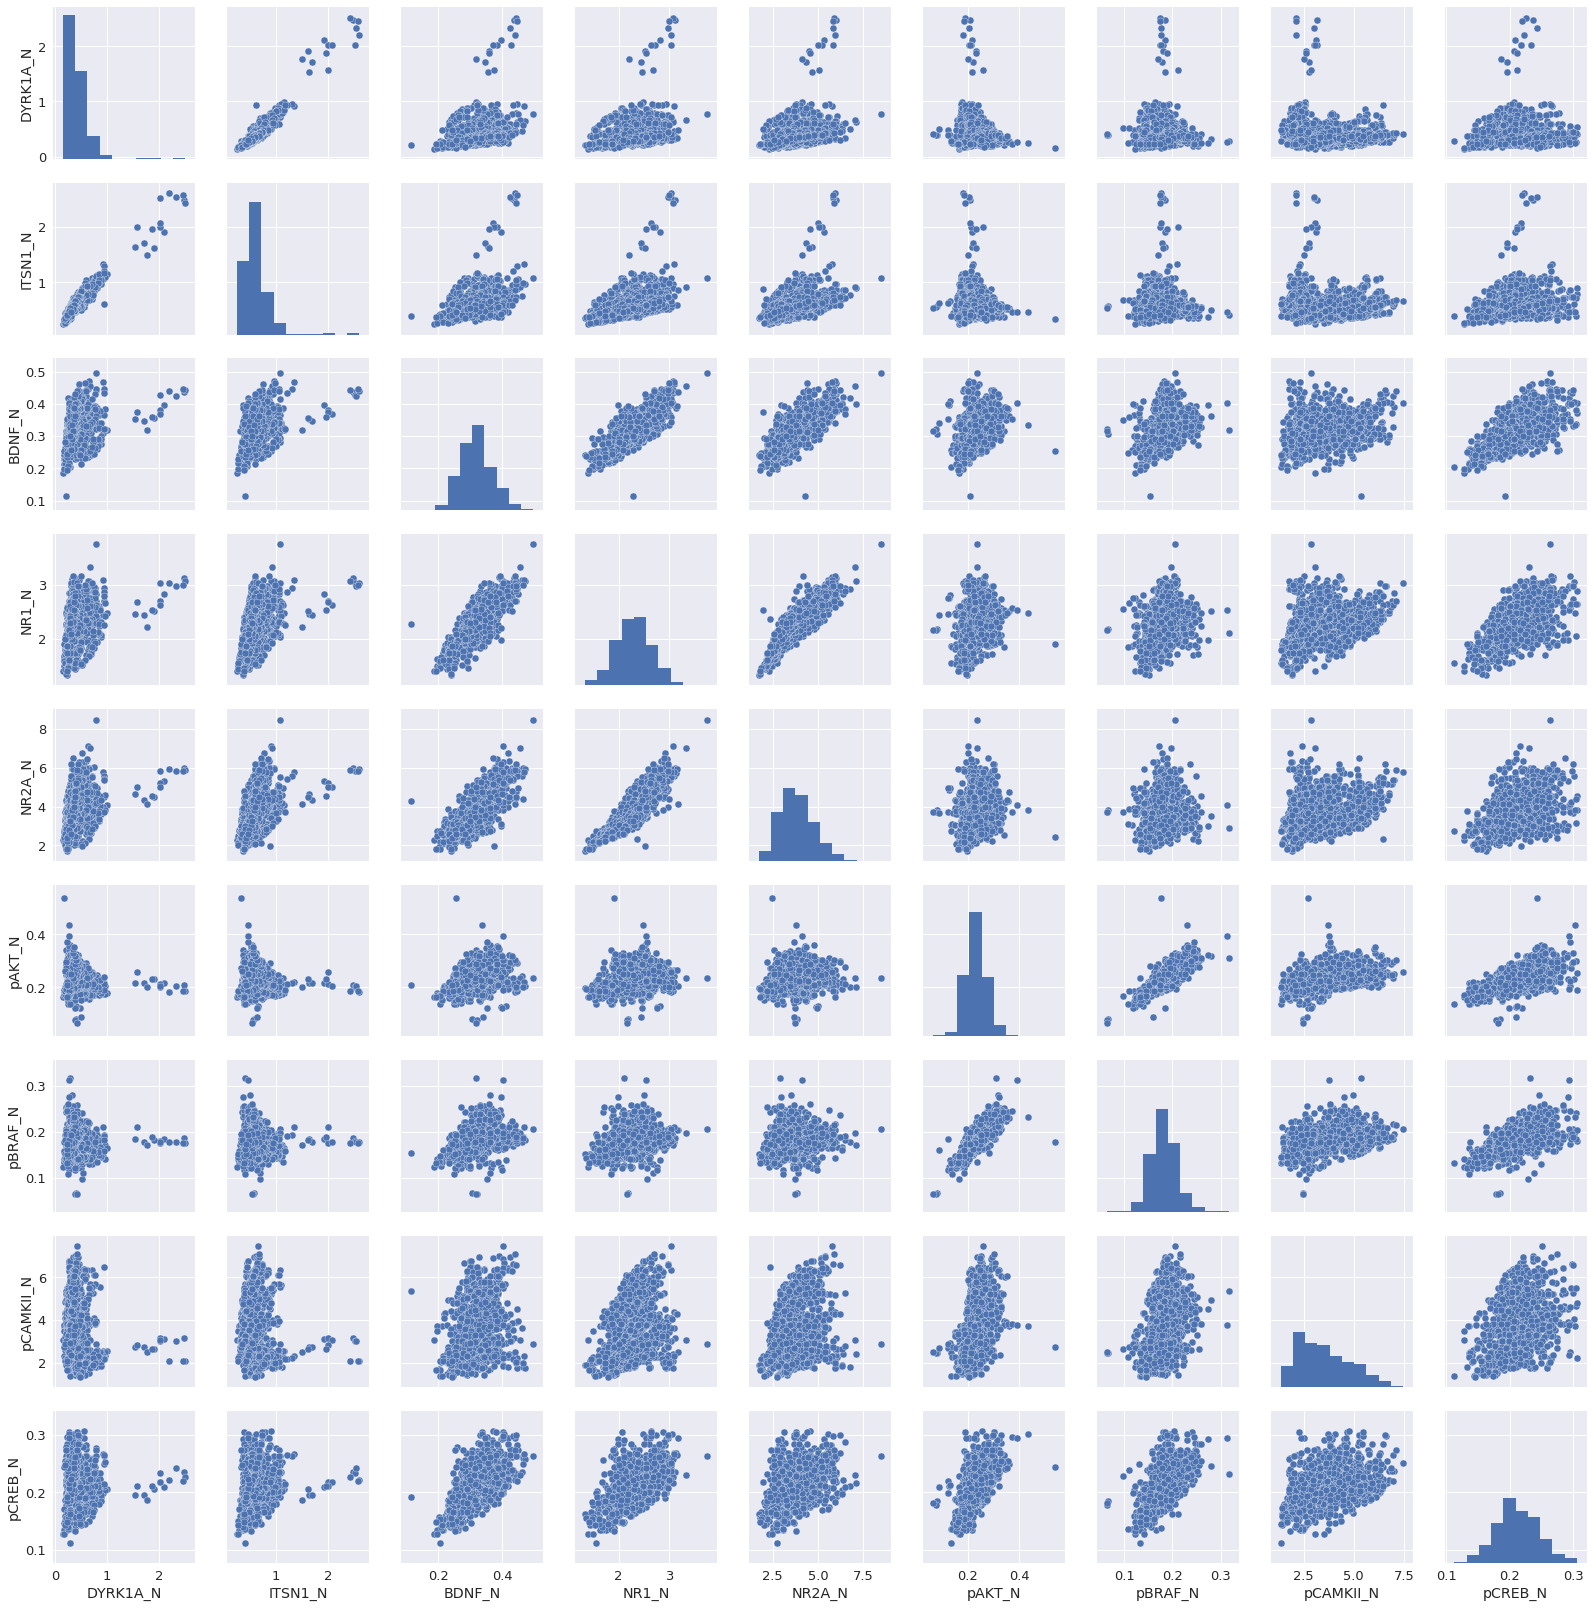

In [6]:
sns.pairplot(data.iloc[:, 1:10].dropna());

Гистограмма и ядерная оценка плотности по `NR1_N`

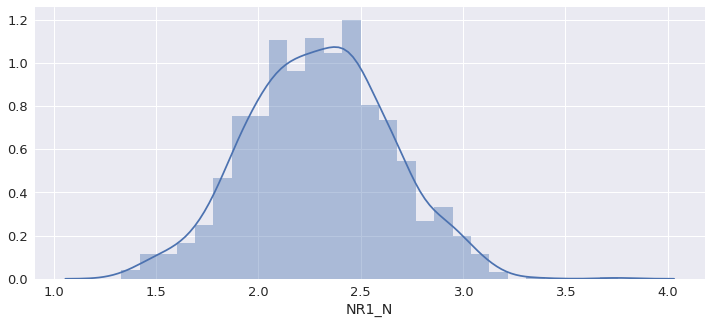

In [7]:
plt.figure(figsize=(12, 5))
sns.distplot(data['NR1_N'].dropna());

Количество мышей каждого класса

In [8]:
data['class'].value_counts()

c-SC-m    150
c-CS-m    150
t-SC-m    135
c-SC-s    135
c-CS-s    135
t-SC-s    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64

Количество мышей по генотипам

In [9]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


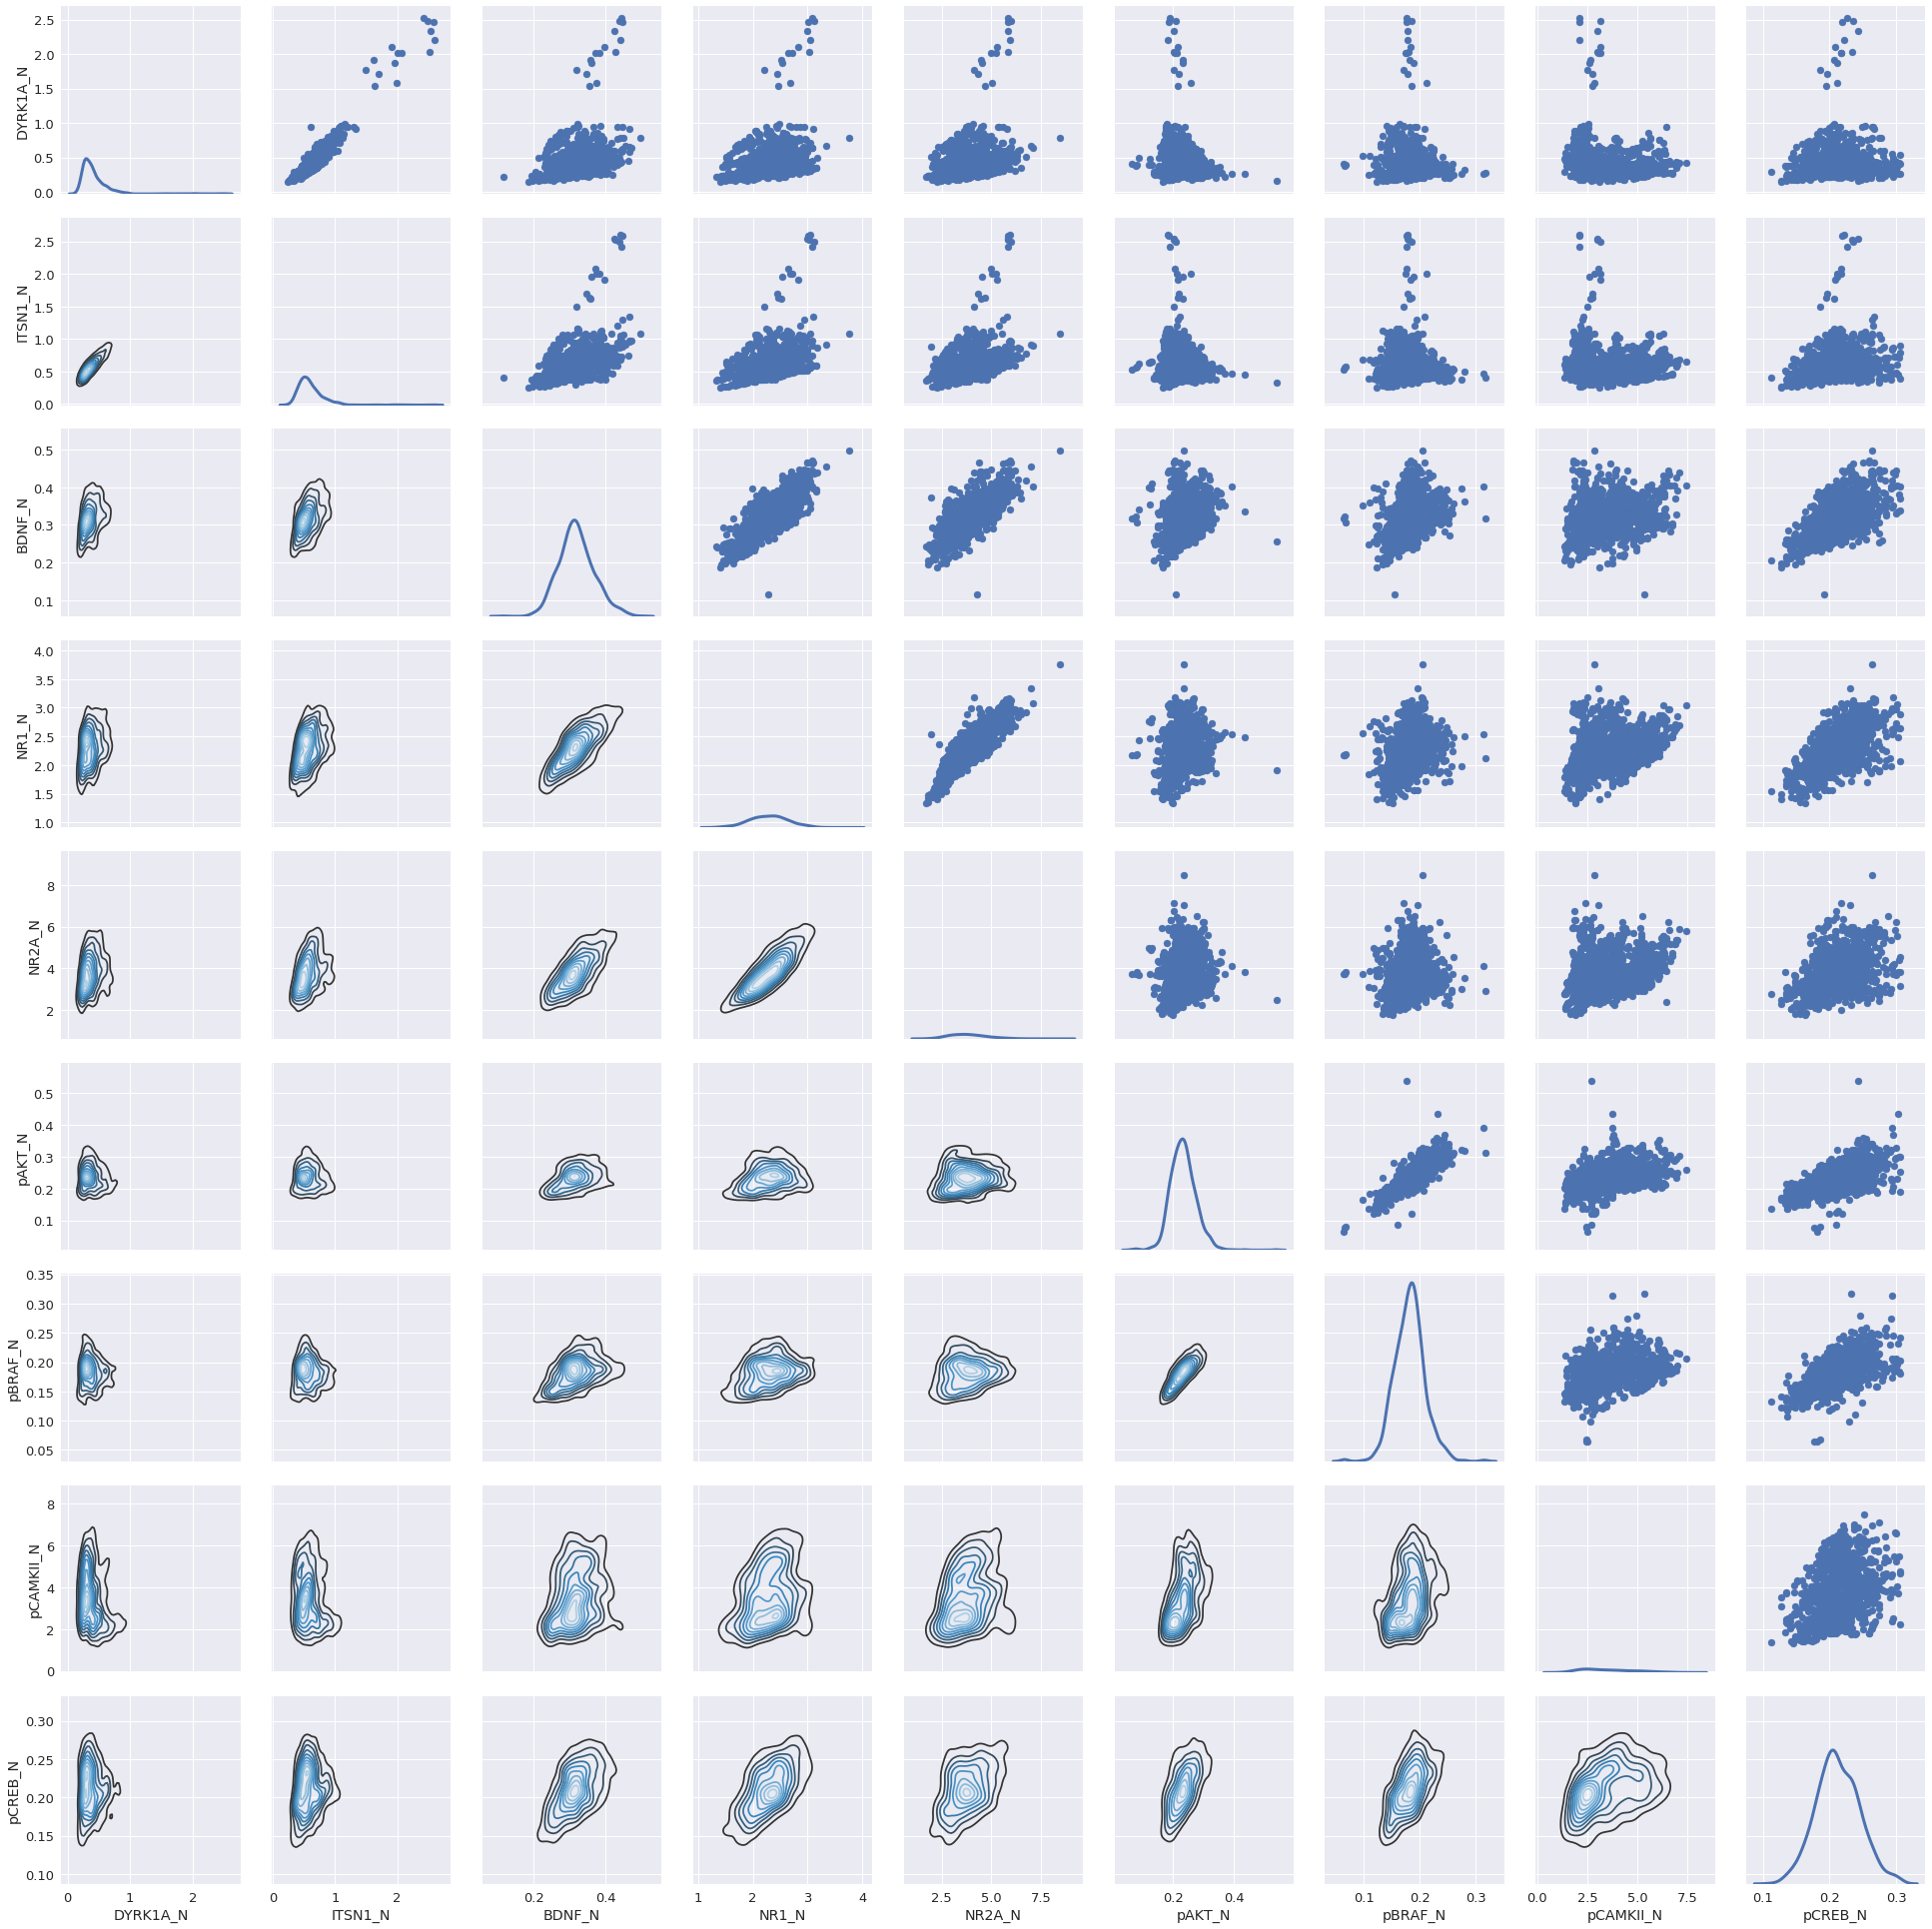

In [10]:
g = sns.PairGrid(data.iloc[:, 1:10].dropna(), size=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.legend();

Корреляционная матрица нескольких первых параметров, посчитанная по коэффициентам корреляции Спирмена

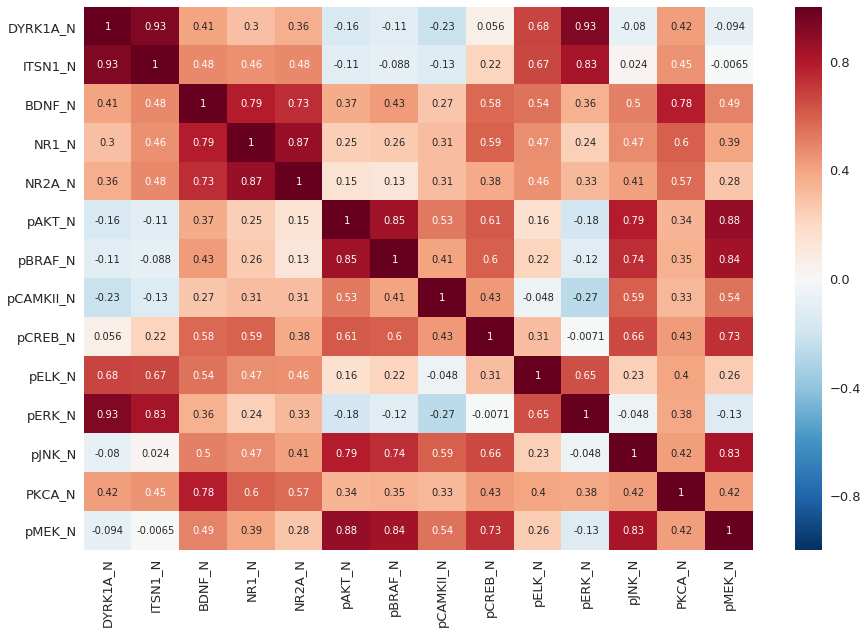

In [11]:
corr_matrix = data.iloc[:, 1:15].corr(method='spearman')

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='RdBu_r', annot=True);

Корреляционная матрица по всем параметрам

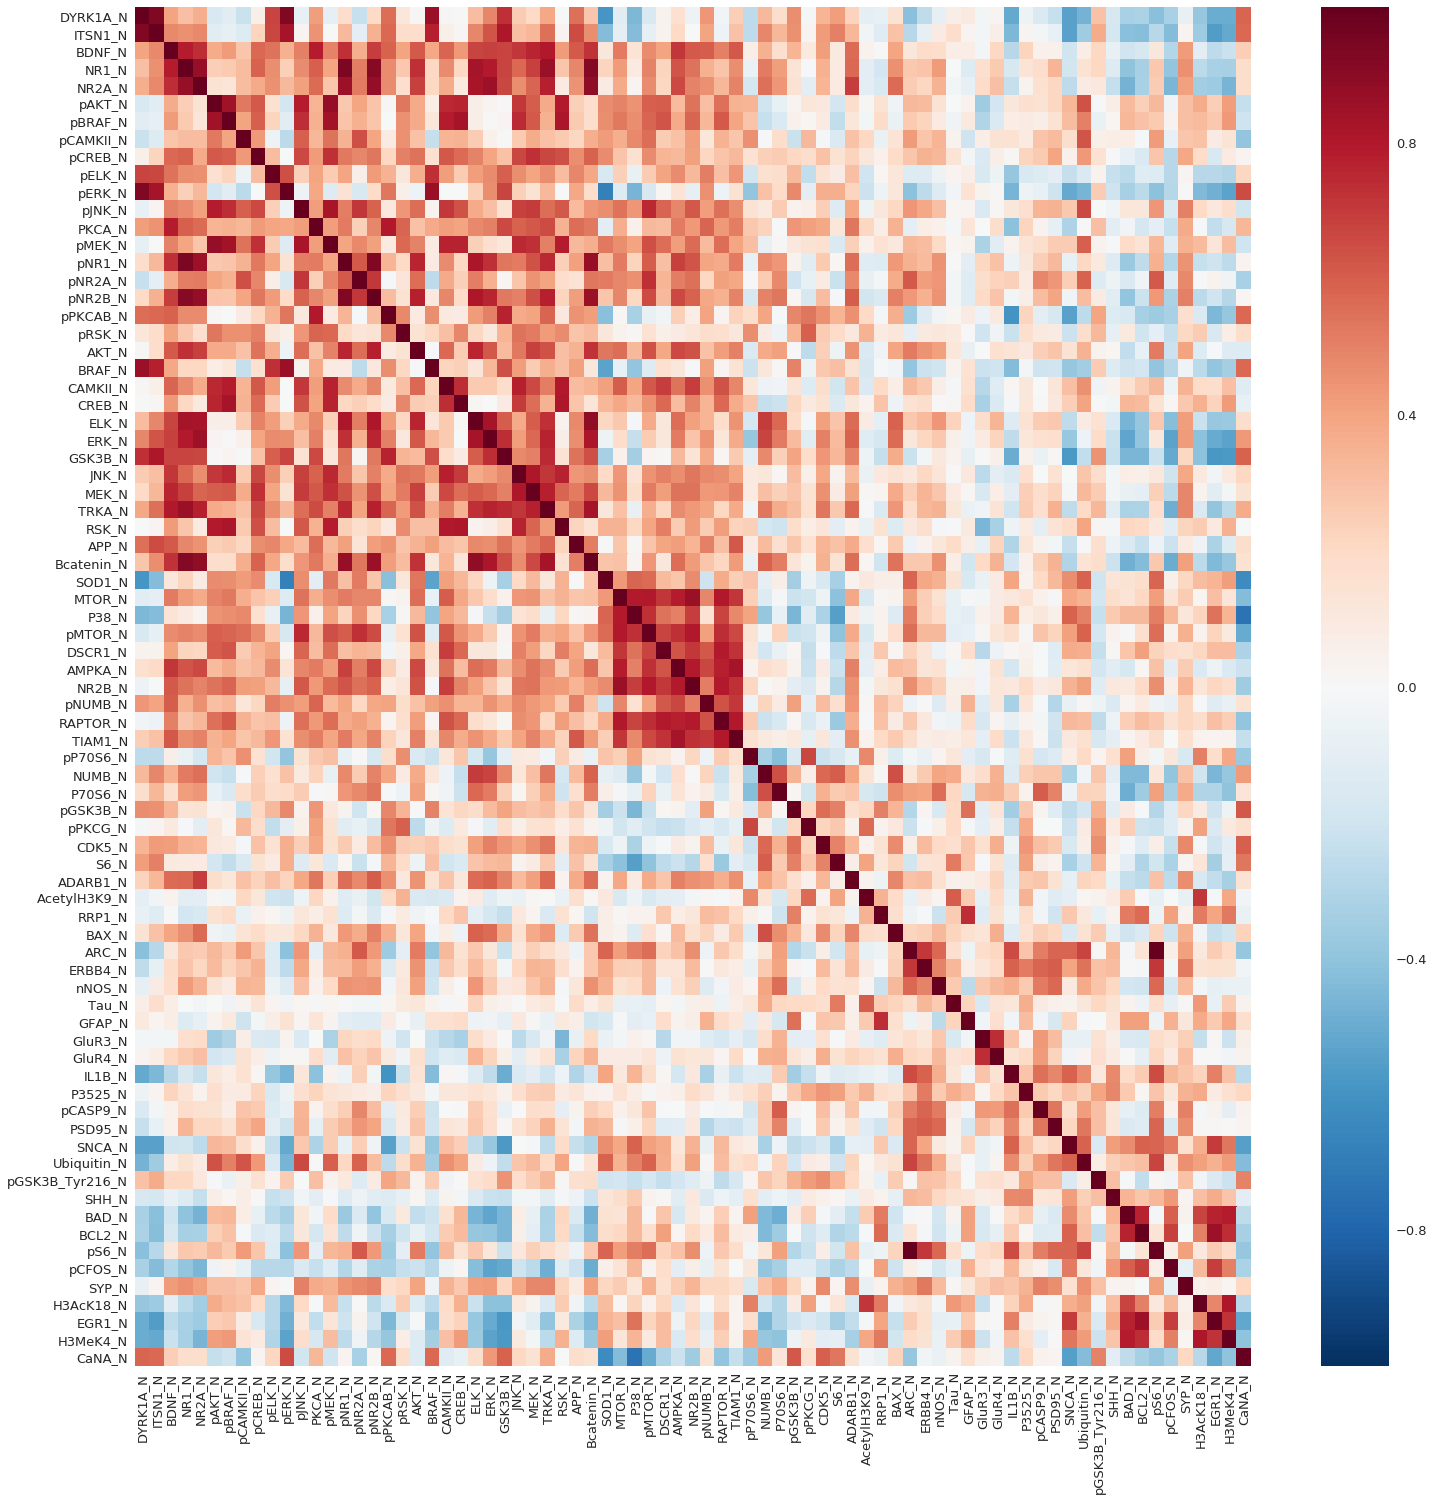

In [12]:
corr_matrix = data.iloc[:, 1:-4].corr(method='spearman')

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='RdBu_r');

Колонку, отвечающую за генотип, преобразуем к числам

In [13]:
data['Genotype_int'] = (data['Genotype'] == 'Ts65Dn').astype(int)

С помощью ядерных оценок плотности посмотрим, как отличаются распределения DYRK1A_N для разных генотипов

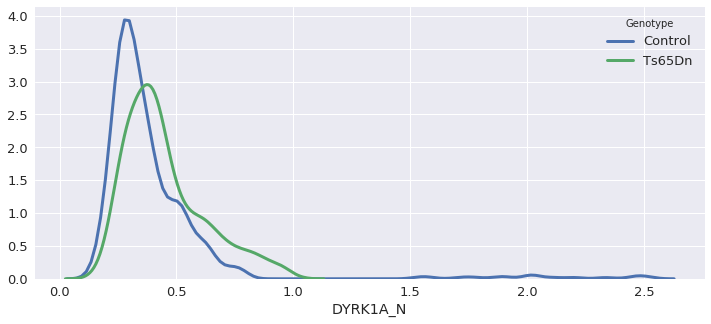

In [14]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data[data['Genotype'] == 'Control']['DYRK1A_N'], 
            label='Control', lw=3)
sns.kdeplot(data[data['Genotype'] == 'Ts65Dn']['DYRK1A_N'], 
            label='Ts65Dn', lw=3)
plt.xlabel('DYRK1A_N')
plt.legend(title='Genotype');

#### Проверим гипотезу о независимости DYRK1A_N от генотипа. 

Составим таблицу сопряженности. Параметр `bins` задает количество корзин для каждой выборки. Выборка Y бинарна, поэтому при указании для нее двух корзин она не изменится.

In [15]:
x, y = data['DYRK1A_N'], data['Genotype_int']
is_nan = np.isnan(x) | np.isnan(y)  # Строки, где есть пропуски

# Строим таблицу сопряженности
obs = np.histogram2d(x[~is_nan], y[~is_nan], 
                     bins=(5, 2))[0]
obs

array([[528., 421.],
       [ 27.,  86.],
       [  1.,   0.],
       [  8.,   0.],
       [  6.,   0.]])

Применяем критерий хи-квадрат. Функция возвращает: статистику критерия, p-value, число степеней свободы у предельного распределения, таблицу ожидаемых значений (используются при подсчете статистики хи-квадрат).

In [16]:
sps.chi2_contingency(obs) 

(54.37039365451169,
 4.4018992723348256e-11,
 4,
 array([[5.02256267e+02, 4.46743733e+02],
        [5.98050139e+01, 5.31949861e+01],
        [5.29247911e-01, 4.70752089e-01],
        [4.23398329e+00, 3.76601671e+00],
        [3.17548747e+00, 2.82451253e+00]]))

Проблема: ожидаемое количество меньше 5 в более чем 20% ячеек.

Так получилось из-за того, что мы брали равномерную сетку, в то время как почти все данные сосредоточены на небольшом интервале. Поэтому теперь ограничим интервал, на котором будем выбирать корзинки.

In [17]:
x, y = data['DYRK1A_N'], data['Genotype_int']
is_nan = np.isnan(x) | np.isnan(y)

obs = np.histogram2d(x[~is_nan], y[~is_nan], 
                     range=((0, 1), (0, 1)),
                     bins=(4, 2))[0]
obs

array([[ 90.,  26.],
       [373., 333.],
       [ 86., 106.],
       [  6.,  42.]])

Теперь все ожидаемые значения больше 5, значит критерий хи-квадрат применим. Поскольку p-value большое, гипотеза о независимости отвергается.

In [18]:
sps.chi2_contingency(obs) 

(64.62248871503874,
 6.040985452827885e-14,
 3,
 array([[ 60.62146893,  55.37853107],
        [368.95480226, 337.04519774],
        [100.33898305,  91.66101695],
        [ 25.08474576,  22.91525424]]))

#### Проверим гипотезу о независимости BDNF_N от генотипа. 

С помощью ядерных оценок плотности посмотрим, как отличаются распределения BDNF_N для разных генотипов

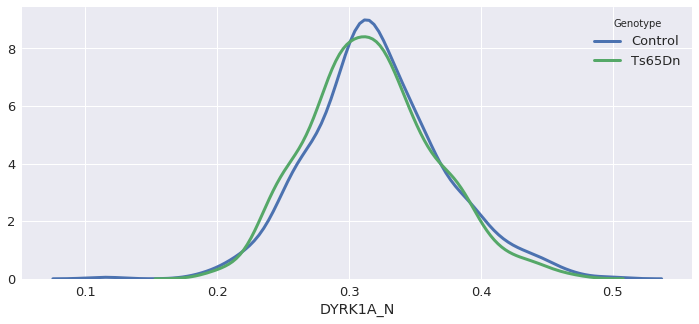

In [19]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data[data['Genotype'] == 'Control']['BDNF_N'], 
            label='Control', lw=3)
sns.kdeplot(data[data['Genotype'] == 'Ts65Dn']['BDNF_N'], 
            label='Ts65Dn', lw=3)
plt.xlabel('DYRK1A_N')
plt.legend(title='Genotype');

При построении таблицы сопряженности сразу возьмем хороший интервал

In [26]:
x, y = data['BDNF_N'], data['Genotype_int']
is_nan = np.isnan(x) | np.isnan(y)
x, y = x[~is_nan], y[~is_nan]

obs = np.histogram2d(x, y, 
                     range=((0.15, 0.5), (0, 1)),
                     bins=(4, 2))[0]
obs

array([[ 21.,  18.],
       [305., 288.],
       [215., 184.],
       [ 28.,  17.]])

По таблице ожидаемых значений видим, что критерий хи-квадрат применим. Значение p-value большое, поэтому гипотеза о независимости не отвергается.

In [27]:
sps.chi2_contingency(obs) 

(2.250513222731621, 0.5220674895813373, 3, array([[ 20.62360595,  18.37639405],
        [313.58457249, 279.41542751],
        [210.99535316, 188.00464684],
        [ 23.7964684 ,  21.2035316 ]]))

Визуально распределения похожи на нормальное. Тем не менее критерий Шапиро-Уилка отвергает нормальность. Таким образом, на данных лучше не использовать методы, не устойчивые к некоторым отклонениям от нормальности.

In [22]:
sps.shapiro(x)

(0.9926453232765198, 3.458527135080658e-05)

Визуально на Q-Q plot точки в целом неплохо ложатся на прямую, но с небольшими отклонениями. Поэтому можно использовать методы, устойчивые к отклонениям от нормальности.


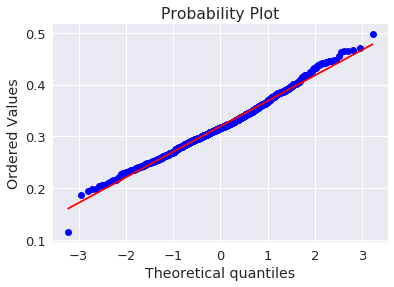

In [23]:
sps.probplot(x, plot=plt.subplot(111));